[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%204/Leçon_4_Demo_shift.ipynb)

# ELE8812 - Traitement fréquentielle

## Démo :  Interprétation des fréquences discrètes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,12)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


## Image originale

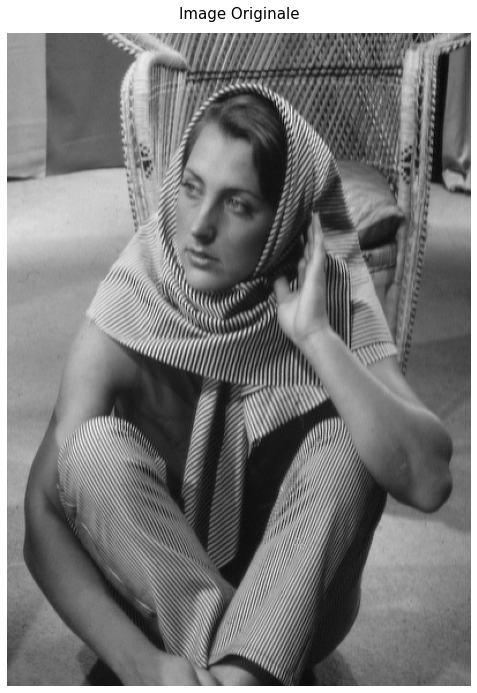

In [3]:
# Charger image
A = plt.imread('Repo/Data/Barbara.tif');

plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

## Module et Log-Module de la transformée de Fourier

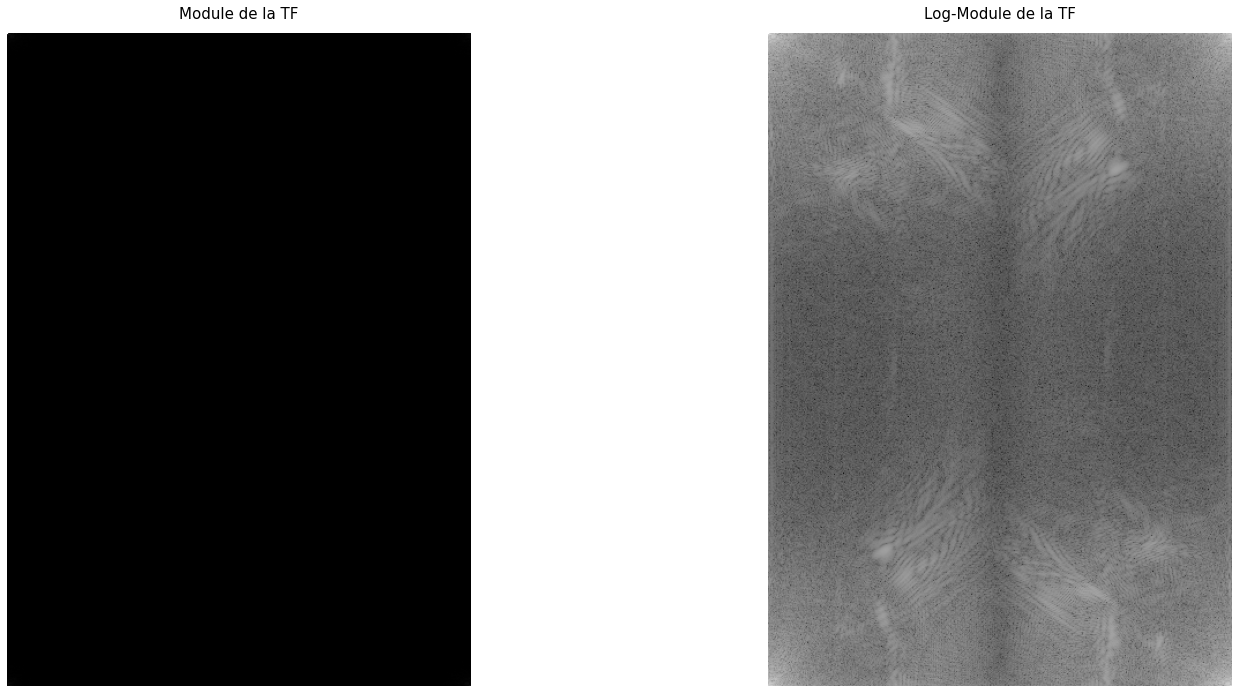

In [ ]:
B = np.fft.fft2(np.double(A))

plt.subplot(121); plt.imshow(np.abs(B), cmap='gray'); plt.title('Module de la TF'); plt.axis('off');
plt.subplot(122); plt.imshow(np.log(np.abs(B)), cmap='gray'); plt.title('Log-Module de la TF'); plt.axis('off'); plt.show();

## Shift de la transformée de Fourier

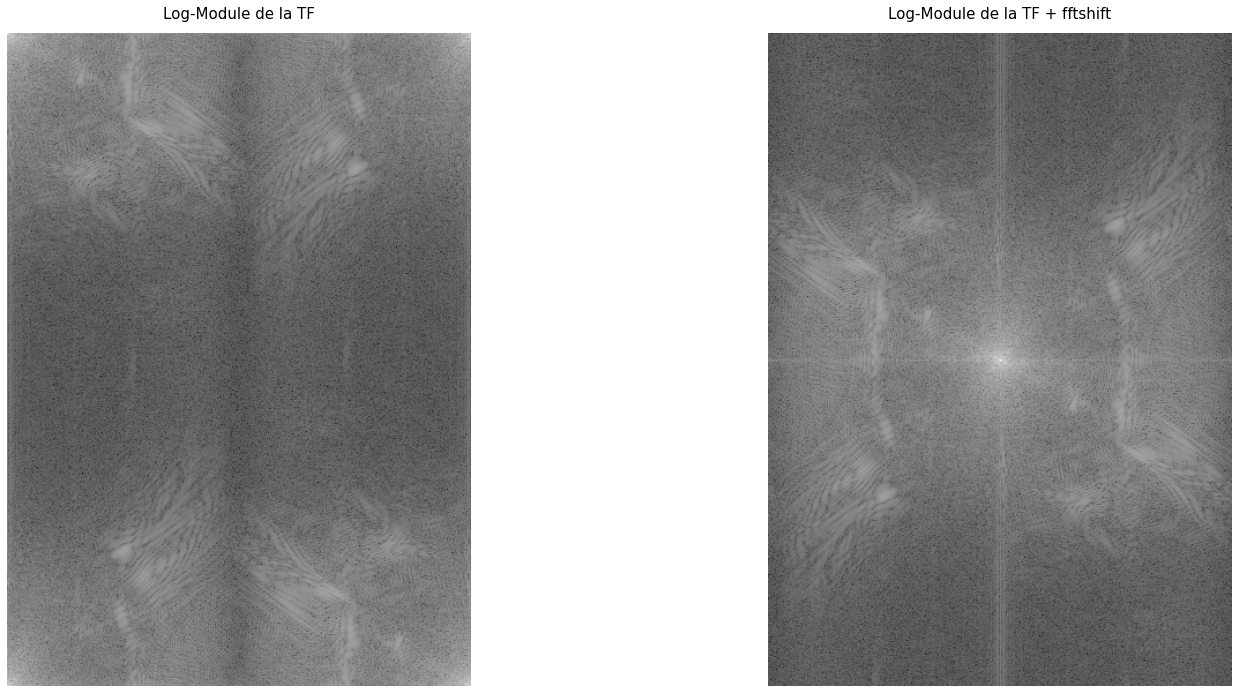

In [ ]:
C = np.fft.fftshift(B)

plt.subplot(121); plt.imshow(np.log(np.abs(B)), cmap='gray'); plt.title('Log-Module de la TF'); plt.axis('off');
plt.subplot(122); plt.imshow(np.log(np.abs(C)), cmap='gray'); plt.title('Log-Module de la TF + fftshift'); plt.axis('off'); plt.show();